In [ ]:
# Practicas de Computer Vision


In [1]:
#Establecemos nuestras crecenciales
cog_key='54ec9847529640e4b2b7fe5b37c94545'
cog_endpoint='https://cvdr-lab1.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://cvdr-lab1.cognitiveservices.azure.com/ using key 54ec9847529640e4b2b7fe5b37c94545


In [2]:
# Instalar la libreria de azure para que funcione azure
%pip install --upgrade azure-cognitiveservices-vision-computervision

In [6]:
# Conectar con azure
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

{'additional_properties': {}, 'tags': ['text', 'person', 'woman', 'store', 'shop'], 'captions': [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageCaption object at 0x0000024C58A1B4C0>], 'request_id': '2b07f1ee-c71c-4bbd-9969-59b50302b3aa', 'metadata': <azure.cognitiveservices.vision.computervision.models._models_py3.ImageMetadata object at 0x0000024C54188A00>, 'model_version': '2021-05-01'}


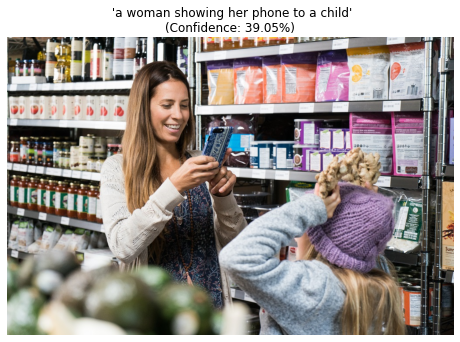

In [8]:
# Importamos bibliotecas
import vision
import os

%matplotlib inline

# Obtenemos la imagen
image_path='./data/vision/store_cam1.jpg'

# Obtener una descripción del servicio Computer Vision
image_stream = open(image_path, "rb")
description = client.describe_image_in_stream(image_stream)
print(description)

# Mostrar una imagen y un subtítulo (código en helper_scripts/vision.py)
vision.show_image_caption(image_path, description)

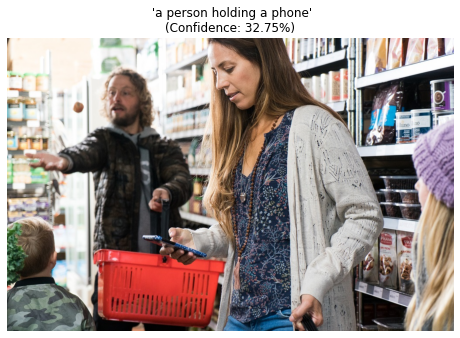

In [9]:
# Una segunda imagen
image_path = './data/vision/store_cam2.jpg'

image_stream = open(image_path, "rb")
description = client.describe_image_in_stream(image_stream)

vision.show_image_caption(image_path, description)

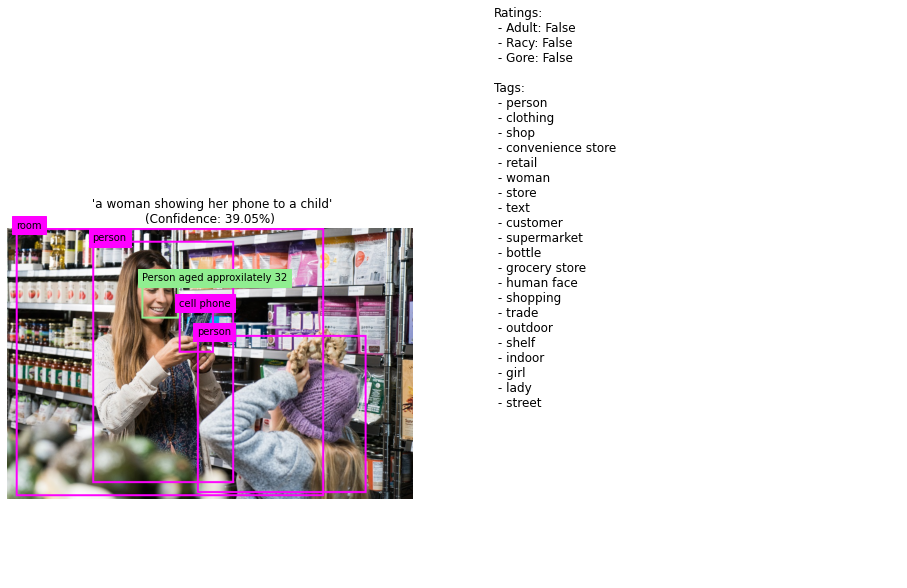

In [12]:
# Obtenemos la imagen para trabajar con ciertas caracteristicas de a imagen
image_path = './data/vision/store_cam1.jpg'

features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

image_stream = open(image_path, "rb")
analysis = client.analyze_image_in_stream(image_stream, visual_features=features)

vision.show_image_analysis(image_path,analysis)

## FaceApi

In [15]:
# Instalar si todavia no se tiene la libreria
# %pip install azure-cognitiveservices-vision-face

     -------------------------------------- 67.7/67.7 kB 407.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Conetarse a Face api en azure
key = '17586a08165d4640aaa47fa5ca849ac7'
endpoint = 'https://facedr-lab2.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(endpoint, key))

In [2]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials

# Crear un cliente de detección facial.
client = FaceClient(endpoint, CognitiveServicesCredentials(key))

In [3]:
# Importar archivo faces y la libreria que se requiere
import faces
import os
%matplotlib inline

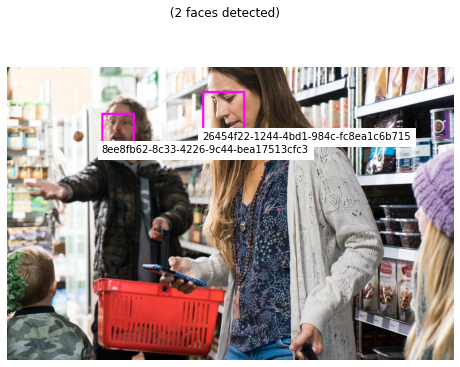

In [5]:
# Abrir imagen
image_path = './data/vision/store_cam2.jpg'
image_stream = open(image_path, "rb")

# Detectar caras
detected_faces = client.face.detect_with_stream(image=image_stream)

# Mostrar las caras (código en python_code/faces.py), show_id=True se puede eliminar si no se quiere mostrar el codigo ID de cada cara
faces.show_faces(image_path, detected_faces, show_id=True)

## Analizar atributos faciales

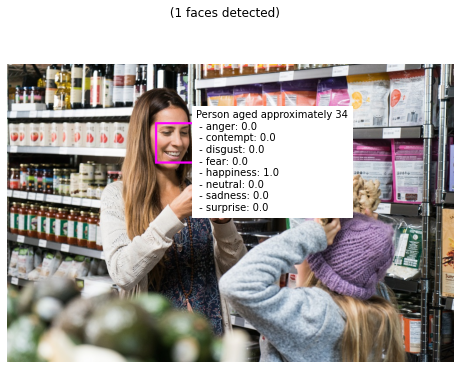

In [8]:
#Abrir imagen
image_path = './data/vision/store_cam1.jpg'
image_stream = open(image_path, "rb")

# Detectar caras y determinados atributos faciales
attributes = ['age', 'emotion']
detected_faces = client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

# Mostrar las caras y los atributos (código en python_code/faces.py)
faces.show_face_attributes(image_path, detected_faces)

Según la puntuación de emociones detectadas, el cliente parece feliz con su experiencia de compra

## Búsqueda de rostros similares

Se pueden usar los ID obtenidos en cada rostro para realizar una comparación con rostros detectados anteriormente. Para hacerlo de manera separada e individual de los anterior se debe cargar el entorno completo nuevamente.

In [3]:
# Conetarse a Face api en azure
key = '17586a08165d4640aaa47fa5ca849ac7'
endpoint = 'https://facedr-lab2.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(endpoint, key))

Ready to use cognitive services at https://facedr-lab2.cognitiveservices.azure.com/ using key 17586a08165d4640aaa47fa5ca849ac7


In [4]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials

# Crear un cliente de detección facial.
client = FaceClient(endpoint, CognitiveServicesCredentials(key))

In [6]:
# Importar archivo faces y la libreria que se requiere
import faces
import os
%matplotlib inline

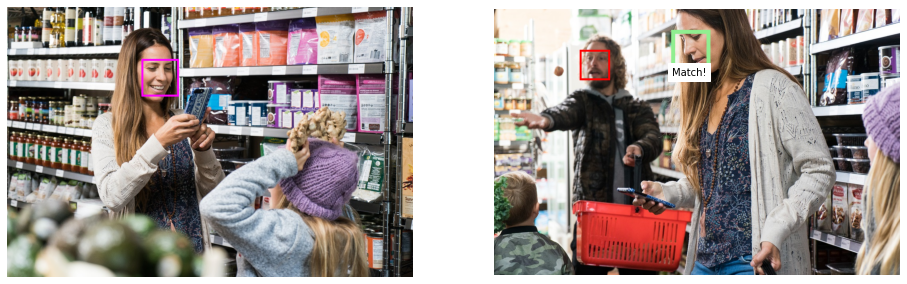

In [7]:
# Obtener el identificador de la primera cara de la imagen 1
image_1_path ='../data/face/store_cam1.jpg'
image_1_stream = open(image_1_path, "rb")
image_1_faces = client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Obtener los identificadores de caras en una segunda imagen
image_2_path ='../data/face/store_cam2.jpg'
image_2_stream = open(image_2_path, "rb")
image_2_faces = client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Encontrar las caras de la imagen 2 que sean similares a la de la imagen 1
similar_faces = client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Mostrar la cara de la imagen 1 y las caras similares de la imagen 2 (código en python_code/face.py)
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)

## Reconocimiento facial

Se puede entrenar a Face para implementar un opción de reconocimiento facial para reconocer un rostro en particular. Esto puede ser útil al usar la identificación biométrica como verificación de identidad.

Ejemplo Northwind Traders, que quiere implementar el sistema de reconocimiento facial para permitir el acceso a los sistemas seguros solo a empleados autorizados del departamento de TI.

In [13]:
# Crear un grupo de personas que represente a los empleados autorizados
group_id = 'employee_group_id'
try:
    # Elimine el grupo si ya existe
    client.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    client.person_group.create(group_id, 'employees')
    print ('Group created!')
    group_id = 'employee_group_id'
try:
    # Elimine el grupo si ya existe
    client.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    client.person_group.create(group_id, 'employees')
    print ('Group created!')

Group created!
Group created!


Se agrega una persona para cada empleado que se quiera incluir en el grupo, después se agregan varias fotografías de cada persona en Face para que puedan analizarse las caracteristicas faciales. Lo ideal es varias fotos de una persona en diferentes poses y diferentes gestos.

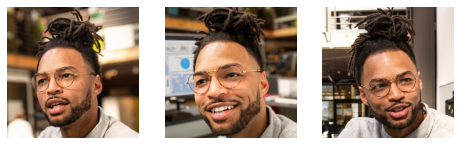

In [15]:
# Se agrega a un empleado llamado Wendell y tres de sus fotografías
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Agregar una persona (Wendell) al grupo
wendell = client.person_group_person.create(group_id, 'Wendell')

# Obtener una foto de wendell
folder ='../data/face/wendell'
wendell_pics = os.listdir(folder)

# Registrar las fotos
i = 0
fig = plt.figure(figsize=(8, 8))
for pic in wendell_pics:
    # Agregue cada foto a la persona en el grupo de personas
    img_path = os.path.join(folder, pic)
    img_stream = open(img_path, "rb")
    client.person_group_person.add_face_from_stream(group_id, wendell.person_id, img_stream)

    # Muestre cada imagen
    img = Image.open(img_path)
    i +=1
    a=fig.add_subplot(1,len(wendell_pics), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()

In [16]:
# Entrenar a Face para que reconozca a Wendell
client.person_group.train(group_id)
print('Trained!')

Trained!


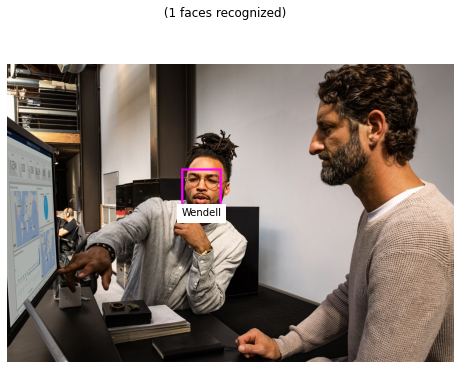

In [17]:
# Usar el reconocimiento facial para identificar caras reconocidas

# Obtener los identificadores de caras en una segunda imagen
image_path ='../data/face/employees.jpg'
image_stream = open(image_path, "rb")
image_faces = client.face.detect_with_stream(image=image_stream)
image_face_ids = list(map(lambda face: face.face_id, image_faces))

# Obtener los nombres de caras reconocidas
face_names = {}
recognized_faces = client.face.identify(image_face_ids, group_id)
for face in recognized_faces:
    person_name = client.person_group_person.get(group_id, face.candidates[0].person_id).name
    face_names[face.face_id] = person_name

# Mostrar las caras reconocidas
faces.show_recognized_faces(image_path, image_faces, face_names)